# High Noise : ChatGPT Fine Tuning

In [1]:
import numpy as np
import pandas as pd
import config
import jupyter_service
import sys
import matplotlib.pyplot as plt
from dbcontext import Context
from wordcloud import WordCloud, ImageColorGenerator
pd.options.display.float_format = '{:.2f}'.format
print(sys.version, np.__version__, pd.__version__, config.version)
context = Context()
context.create(echo=False)
service = jupyter_service.JupyterService(context)
nb_form=15854
pd.set_option('max_colwidth', 1000)
print(config.connection_string)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)] 2.0.2 2.2.3 0.1.0.Beta
postgresql://postgres:sa@localhost:5432/yt1


In [2]:
question_nb = 12

In [58]:
empathy_category = "f"
df = service.get_highlevel_linked(question_nb, empathy_category, True)
df.to_csv(f"out/chatgpt_fine_{empathy_category}2.csv", index=False)
df

,id,main_topic,score,topic0_id,topic1_id,topic1,topic2_id,topic2,explaination
0,50,peace,1.00,34177,30719,peace,0,None,"Fantasy evokes imagination, creativity, and escapism, while peace brings harmony, tranquility, and unity among individuals and communities."
1,49,happiness,1.00,34176,30734,happiness,0,None,"Fantasy ignites imagination, sparks joy, fuels dreams, fosters creativity, encourages escapism, and cultivates hope for a brighter future."
2,56,health,0.95,34183,30784,health,0,None,"Fantasy promotes creativity and imagination, enhancing mental health, reducing stress, and fostering resilience through escapism and storytelling."
3,48,personal growth,0.95,34175,30872,personal,30851,growth,"Fantasy inspires imagination and creativity, while personal growth fosters self-awareness, resilience, and a journey towards realizing one's potential."
4,60,educational aspirations,0.90,34187,33579,educational,32164,aspirations,"Fantasy sparks imagination, creativity fosters innovation, and educational aspirations inspire growth, opening pathways to knowledge and personal development."
5,53,equality,0.90,34180,30721,equality,0,None,"Fantasy fosters imagination, creativity, and diverse worlds, while equality promotes fairness, inclusivity, and justice for all individuals."
6,61,career success,0.90,34188,30701,career,30801,success,"Imagination fuels innovation, determination drives achievement, collaboration enhances growth, and passion ignites purpose in fantasy and career journeys."
7,51,family,0.90,34178,30818,family,0,None,"Fantasy fosters imagination, creativity, adventure, and wonder, while family brings love, support, connection, and shared experiences."
8,62,financial stability,0.85,34189,30907,financial,31030,stability,"Fantasy fosters creativity and imagination, while financial stability ensures security and freedom to pursue dreams and aspirations."
9,52,sustainability,0.85,34179,30761,sustainability,0,None,"Fantasy encourages creativity and imagination, while sustainability promotes harmony with nature and responsible resource use for future generations."


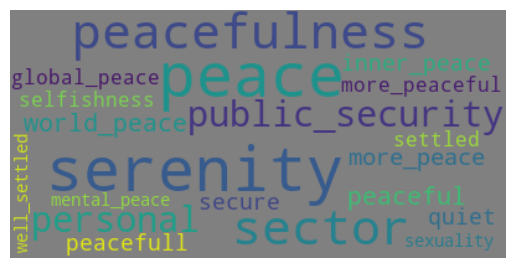

In [59]:
for i in range(len(df)-1,-1,-1):
    topic1 = df.topic1[i]
    if topic1 is not None:
        df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
        df_lema3 = service.get_lemas(topic1, "textrank")
    topic2 = df.topic2[i]
    if topic2 is not None:
       df_lema2 = service.get_lemas(topic1, "gpt-4o-mini")
    df_lema = pd.concat([df_lema1, df_lema2, df_lema3], ignore_index=True)
    df_lema.to_csv(f"out/lemas/lemas_gpt_{df.main_topic[i].replace(' ','_')}.csv", index=False)
service.show_lemas(df_lema)

In [52]:
empathy_category = "f"
df = service.get_highlevel_linked(question_nb, empathy_category, False)
df.to_csv(f"out/chatgpt_fine_{empathy_category}0.csv", index=False)
df

,id,main_topic,score,topic0_id,topic1_id,topic1,topic2_id,topic2,explaination
0,16,war,0.95,34143,30900,war,0,None,"Fantasy often includes escapism, conflict, and loss, while war embodies destruction, suffering, and moral ambiguity."
1,22,violence,0.91,34149,30903,violence,0,None,"Negative terms often include glorification, desensitization, aggression, harm, addiction, escapism, and distorted reality."
2,20,corruption,0.90,34147,31120,corruption,0,None,"Fantasy can lead to escapism, disillusionment, and unrealistic expectations, while corruption erodes trust, integrity, and societal progress."
3,19,inequality,0.90,34146,31744,inequality,0,None,"Fantasy can perpetuate unrealistic expectations and distract from real inequalities, fostering disconnection from social justice and genuine issues."
4,21,racism,0.88,34148,31092,racism,0,None,"Fantasy and racism often intertwine, perpetuating stereotypes and exclusion, undermining diversity and cultural representation in fictional worlds."
5,65,environmental degradation,0.87,34192,30988,environmental,0,None,"Fantasy often distracts from real environmental issues, leading to neglect, inaction, and a distorted understanding of ecological crises."
6,69,economic stability,0.86,34196,31112,economic,31030,stability,"Fantasy can lead to unrealistic expectations, overspending, and financial instability, hindering rational decision-making and economic health."
7,64,sexism,0.85,34191,0,None,0,None,"Fantasy can reinforce sexism by idealizing stereotypes, objectifying women, and perpetuating power imbalances in narratives and characters."
8,63,climate change,0.85,34190,30795,climate,0,None,"Negative terms include denial, apathy, misinformation, pessimism, dystopia, hopelessness, eco-anxiety, and greenwashing in the fantasy context of climate change."
9,70,political instability,0.83,34197,0,None,0,None,"Fantasy can distract from reality, while political instability breeds chaos, mistrust, and uncertainty, undermining societal progress and safety."


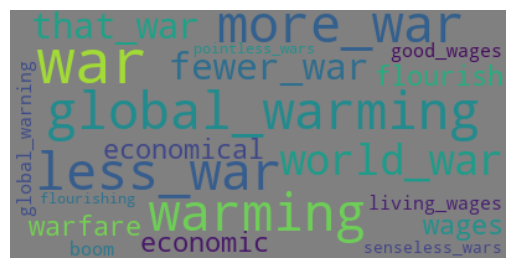

In [57]:
for i in range(len(df)-1,-1,-1):
    topic1 = df.topic1[i]
    if topic1 is not None:
        df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
        df_lema3 = service.get_lemas(topic1, "textrank")
    topic2 = df.topic2[i]
    if topic2 is not None:
       df_lema2 = service.get_lemas(topic1, "gpt-4o-mini")
    df_lema = pd.concat([df_lema1, df_lema2, df_lema3], ignore_index=True)
    df_lema.to_csv(f"out/lemas/lemas_gpt_{df.main_topic[i].replace(' ','_')}.csv", index=False)
service.show_lemas(df_lema)